In [1]:
#Run the following code to print multiple outputs from a cell
get_ipython().ast_node_interactivity = 'all'

## Practice Final Exam

Solutions for the Bike Rental Question:

### Importing Data and Profiling

In [2]:
import pandas as pd
df = pd.read_csv("dataSeoulBike71.csv")
df
df.dtypes
df.describe()
df.isna().sum()

,Date,RentedBikeCount,Forecast,Temperature,Humidity,WindSpeed,Rainfall
0,2018-10-11,2378,Silver,12.1,40,2.4,NaN
1,2018-10-17,1200,Normal,11.2,63,1.1,NaN
2,2018-06-14,2962,Gold,24.0,61,1.5,NaN
3,2018-10-12,412,Normal,5.8,67,1.1,NaN
4,2018-05-21,1820,Silver,22.7,42,1.9,NaN
...,...,...,...,...,...,...,...
8317,2018-05-09,3130,Gold,20.6,41,2.3,NaN
8318,2018-05-14,2906,Gold,23.6,48,3.1,NaN
8319,2018-02-21,469,Normal,13.1,14,3.7,NaN
8320,2018-03-04,23,Normal,18.4,97,2.6,NaN


Date                object
RentedBikeCount      int64
Forecast            object
Temperature        float64
Humidity             int64
WindSpeed          float64
Rainfall           float64
dtype: object

,RentedBikeCount,Temperature,Humidity,WindSpeed,Rainfall
count,8322.000000,8322.000000,8322.000000,8322.000000,502.000000
mean,704.915285,15.757714,58.166547,1.724682,2.463944
std,646.749614,9.062033,20.332559,1.037656,3.966058
min,0.000000,-7.800000,0.000000,0.000000,0.100000
25%,191.000000,8.800000,42.000000,0.900000,0.500000
50%,504.000000,15.300000,57.000000,1.500000,1.000000
75%,1066.000000,22.700000,74.000000,2.300000,2.500000
max,3556.000000,39.400000,98.000000,7.400000,35.000000


Date                  0
RentedBikeCount       0
Forecast              0
Temperature           0
Humidity              0
WindSpeed             0
Rainfall           7820
dtype: int64

array([[<AxesSubplot: xlabel='RentedBikeCount', ylabel='RentedBikeCount'>,
        <AxesSubplot: xlabel='Temperature', ylabel='RentedBikeCount'>,
        <AxesSubplot: xlabel='Humidity', ylabel='RentedBikeCount'>,
        <AxesSubplot: xlabel='WindSpeed', ylabel='RentedBikeCount'>,
        <AxesSubplot: xlabel='Rainfall', ylabel='RentedBikeCount'>],
       [<AxesSubplot: xlabel='RentedBikeCount', ylabel='Temperature'>,
        <AxesSubplot: xlabel='Temperature', ylabel='Temperature'>,
        <AxesSubplot: xlabel='Humidity', ylabel='Temperature'>,
        <AxesSubplot: xlabel='WindSpeed', ylabel='Temperature'>,
        <AxesSubplot: xlabel='Rainfall', ylabel='Temperature'>],
       [<AxesSubplot: xlabel='RentedBikeCount', ylabel='Humidity'>,
        <AxesSubplot: xlabel='Temperature', ylabel='Humidity'>,
        <AxesSubplot: xlabel='Humidity', ylabel='Humidity'>,
        <AxesSubplot: xlabel='WindSpeed', ylabel='Humidity'>,
        <AxesSubplot: xlabel='Rainfall', ylabel='Humidity'>],

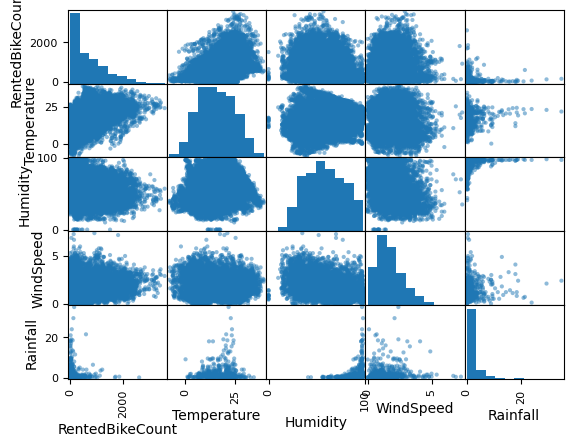

In [3]:
pd.plotting.scatter_matrix(df)

Normal    6385
Silver    1680
Gold       257
Name: Forecast, dtype: int64

<AxesSubplot: >

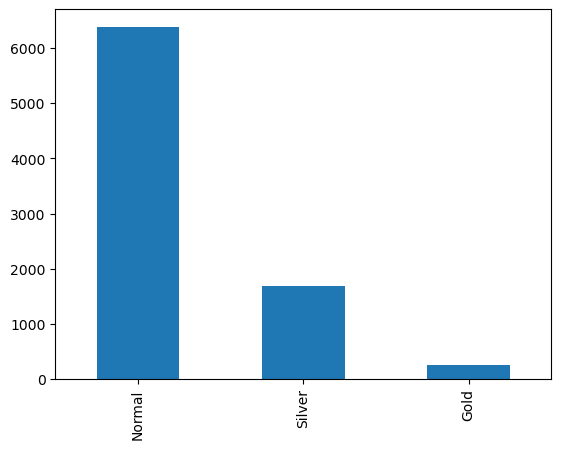

In [4]:
df["Forecast"].value_counts()
df["Forecast"].value_counts().plot.bar()

In [5]:
df["Date"].value_counts()

2018-09-01    24
2018-05-03    24
2018-02-01    24
2018-03-20    24
2018-10-16    24
              ..
2018-11-29    20
2018-07-28    20
2018-06-28    19
2018-07-25    19
2018-11-06    19
Name: Date, Length: 365, dtype: int64

### Feature Engineering

In [6]:
# If the Rainfall is missing, assume that workers failed to record 
# the lack of rain and that the Rainfall was 0.
df.loc[pd.isna(df["Rainfall"]), "Rainfall"] = 0

# Rainfall of more than 13 mm is not valid; ignore any rows with invalid rainfall.
df = df.query("Rainfall <= 13")

# You found out that the thermometer used to measure the Temperature before 
# 2018-02-17 was broken. All the Temperature readings before 2018-02-17 are 11 
# degrees too high in the data; correct these incorrect Temperature values.
df.loc[df["Date"] < "2018-02-17", "Temperature"] = df["Temperature"] - 11

# You're more interested in the effect of which weekday or month a date falls on
# than the individual date. Add variables for weekday and month.
df["Weekday"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d").dt.day_name()
df["Month"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d").dt.month_name()

In [7]:
df.describe()

,RentedBikeCount,Temperature,Humidity,WindSpeed,Rainfall
count,8307.000000,8307.000000,8307.000000,8307.000000,8307.000000
mean,706.031780,13.393054,58.096184,1.724738,0.112845
std,646.770248,12.038896,20.283288,1.037514,0.725898
min,0.000000,-18.800000,0.000000,0.000000,0.000000
25%,192.000000,4.900000,42.000000,0.900000,0.000000
50%,506.000000,15.000000,57.000000,1.500000,0.000000
75%,1068.000000,22.700000,74.000000,2.300000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,13.000000


## Regression Model

In [8]:
# Include a linear regression (ols) model that estimates the RentedBikeCount. 
# Do NOT use the Forecast column in your model.

import statsmodels.formula.api as smf
ResultOLS = smf.ols("RentedBikeCount ~ Temperature + Humidity + WindSpeed + Rainfall + Weekday + Month", \
                    data = df).fit()
print(ResultOLS.summary())

                            OLS Regression Results                            
Dep. Variable:        RentedBikeCount   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     296.6
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        18:12:47   Log-Likelihood:                -63221.
No. Observations:                8307   AIC:                         1.265e+05
Df Residuals:                    8285   BIC:                         1.266e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              823.2746 

The model has an R^2 of 0.429 (42.9% of the variability in Bike Rentals is explained by the model). All independent variables are statistically significant at the 0.05 level except Monday, Wednesday, Thursday, and July:
* For each 1 degree Celsius increase in Temperature, rentals are predicted to increase by 24.4 bikes on average, holding other variables constant
* For each 1 percent increase in Humidity, rentals are predicted to decrease by 8.3 bikes on average, holding other variables constant
* For each 1 meter per second increase in WindSpeed, rentals are predicted to increase by 49.6 bikes on average, holding other variables constant
* For each 1 mm increase in Rainfall, rentals are predicted to decrease by 97.3 bikes on average, holding other variables constant
* The weekday predicted to have the highest number of rentals is Friday, holding other variables constant (all of the other weekdays have a negative coefficient in reference to Friday)
* The month predicted to have the highest number of rentals is June, with 353 more rentals than the reference category of April, holding other variables constant

## Random Forest

In [9]:
# Predict the Forecast column using a random forest model. (Do NOT use the RentedBikeCount 
# in your model.) The training data should contain about 2/3 of the data, and the test set 
# should contain 1/3 of the data. Assess the accuracy and fit of the random forest model.
outcome = df["Forecast"]
numericFeatures = df[["Temperature", "Humidity", "WindSpeed", "Rainfall"]]
dummiesWeekday = pd.get_dummies(df["Weekday"], prefix = "Weekday", drop_first = True)
dummiesMonth = pd.get_dummies(df["Month"], prefix = "Month", drop_first = True)
features = pd.concat([numericFeatures, dummiesWeekday, dummiesMonth], axis = 1)
outcome
features

0       Silver
1       Normal
2         Gold
3       Normal
4       Silver
         ...  
8317      Gold
8318      Gold
8319    Normal
8320    Normal
8321      Gold
Name: Forecast, Length: 8307, dtype: object

,Temperature,Humidity,WindSpeed,Rainfall,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,12.1,40,2.4,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,11.2,63,1.1,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,24.0,61,1.5,0.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,5.8,67,1.1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,22.7,42,1.9,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8317,20.6,41,2.3,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8318,23.6,48,3.1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8319,13.1,14,3.7,0.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
8320,18.4,97,2.6,0.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
from sklearn.model_selection import train_test_split
featuresTrain, featuresTest, outcomeTrain, outcomeTest = train_test_split(features, outcome, test_size = 0.33, random_state = 42)

In [11]:
# 1. Set-up the model
import sklearn.ensemble
modelForest = sklearn.ensemble.RandomForestClassifier(random_state = 42)

# 2. Fit the model using the training data
resultForest = modelForest.fit(featuresTrain, outcomeTrain)

# 3. Predict outcomes from the training and testing data
predForestTrain = modelForest.predict(featuresTrain)
predForestTest = modelForest.predict(featuresTest)

# 4. Assess the fit
print(sklearn.metrics.classification_report(outcomeTrain, predForestTrain))
print(sklearn.metrics.classification_report(outcomeTest, predForestTest))

              precision    recall  f1-score   support

        Gold       1.00      1.00      1.00       165
      Normal       1.00      1.00      1.00      4294
      Silver       1.00      1.00      1.00      1106

    accuracy                           1.00      5565
   macro avg       1.00      1.00      1.00      5565
weighted avg       1.00      1.00      1.00      5565

              precision    recall  f1-score   support

        Gold       0.23      0.05      0.09        92
      Normal       0.83      0.93      0.88      2076
      Silver       0.53      0.39      0.45       574

    accuracy                           0.78      2742
   macro avg       0.53      0.46      0.47      2742
weighted avg       0.75      0.78      0.76      2742



The overall accuracy of the model in predicting the Forecast against test data is 78%. It's best at predicting Normal (88%), with a 45% accuracy predicting Silver and only 9% accuracy predicting Gold. It's clear that there has been overfitting here...the classification results on the training data show 100% accuracy, which is infeasible for a model that does not show overfitting.

## Tableau graph
There are a lot of different graphs you could create. I chose to highlight the relationship between temperature/month and bike rentals:

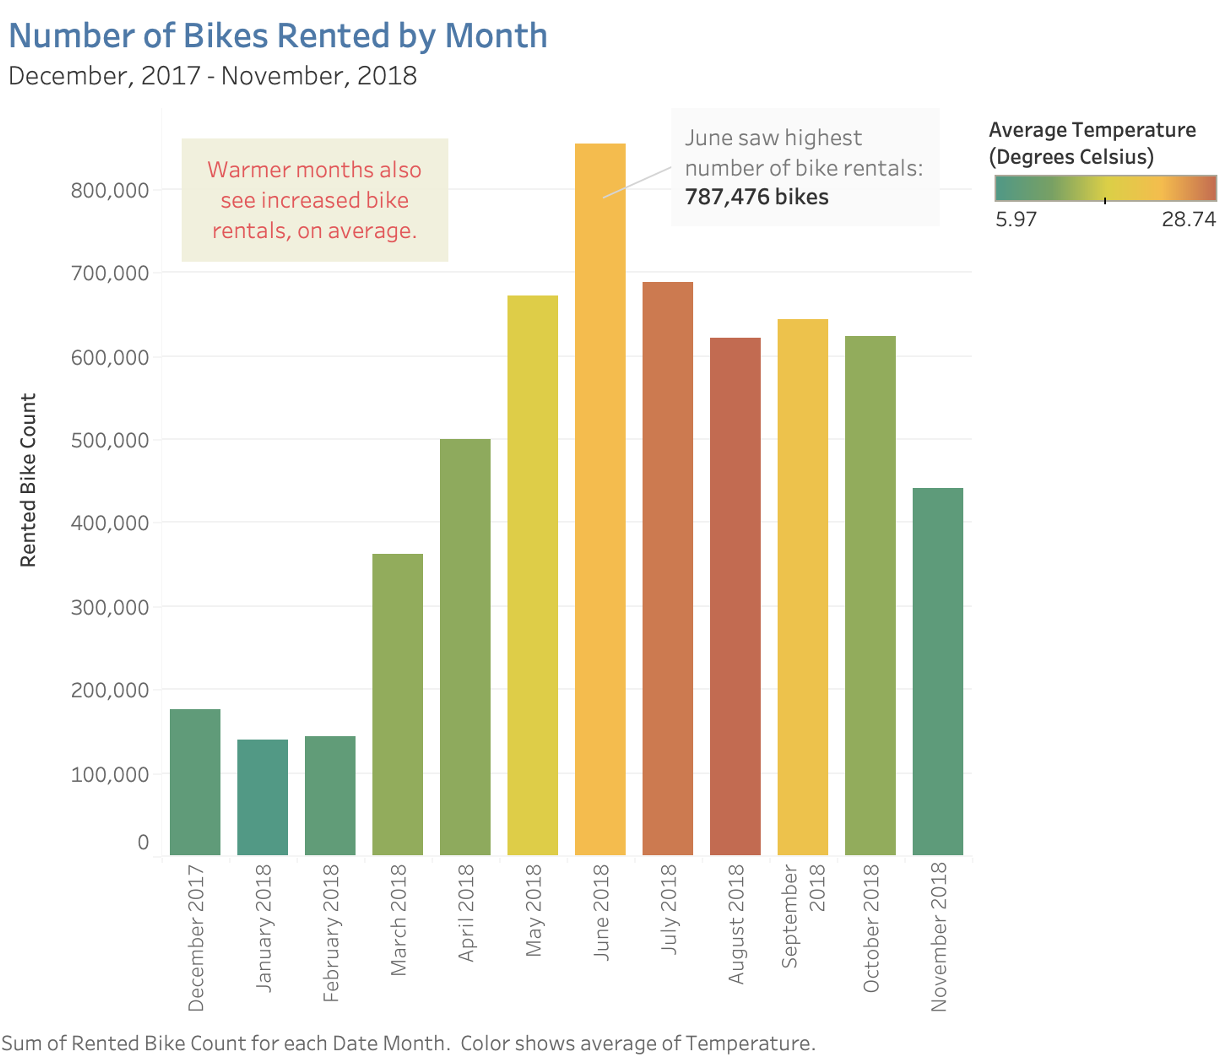